# Python実践データ分析 100本ノック  
## 第9章

### ノック81

In [2]:
import cv2
img = cv2.imread("img01.jpg")
height, width = img.shape[:2]
print("画像幅:"+str(width))
print("画像高さ:"+str(height))
cv2.imshow("img", img)
cv2.waitKey(0)

画像幅:1920
画像高さ:1440


-1

cv2.imreadのパスに日本語を入れると読み込み処理に失敗する。

### ノック82

In [3]:
cap = cv2.VideoCapture("mov01.avi")
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
print("画像幅:"+str(width))
print("画像高さ"+str(height))
print("総フレーム数:"+str(count))
print("FPS:"+str(fps))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

画像幅:1920.0
画像高さ1440.0
総フレーム数:401.0
FPS:30.0


キーボード入力待ち
```
cv2.waitKey(1) & 0xFF
```
qが押された場合は終了する
```
if key == ord('q'):
```

### ノック83

In [7]:
import os
new_dir_path = "./snapshot"
os.mkdir(new_dir_path)

In [8]:
import cv2
cap = cv2.VideoCapture("mov01.avi")
num = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow("frame", frame)
        # 先にsnapshotフォルダを作成しておかないと、格納されない。
        filepath = "snapshot/snapshot_"+str(num)+".jpg"
        cv2.imwrite(filepath, frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    num += 1
cap.release()
cv2.destroyAllWindows()

### ノック84

In [12]:
import cv2

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride":(8,8), "padding":(32,32),"scale":1.05, "hitThreshold":0, "finalThreshold":5}

img = cv2.imread("img01.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
human, r = hog.detectMultiScale(gray, **hogParams)
if (len(human)>0):
    for (x,y,w,h) in human:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,255,255),3)
cv2.imshow("img", img)
cv2.waitKey(0)

113

### ノック85

In [7]:
import cv2

# パスに日本語が入っているとCascadeClassifierが失敗する。
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

img = cv2.imread("img02.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(gray, minSize=(50,50))

for (x,y,w,h) in face_list:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),3)
cv2.imshow("img",img)
cv2.waitKey(0)

-1

### ノック86

In [8]:
import cv2
import dlib # dlibライブラリが入ってない
import math

predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

img = cv2.imread("img02.jpg")
dets = detector(img, 1)

cv2.imshow("img",img)
cv2.waitKey(0)

ModuleNotFoundError: No module named 'dlib'

### ノック87

In [17]:
import cv2
cap = cv2.VideoCapture("mov01.avi")
Width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
Height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride":(8,8), "padding":(32,32),"scale":1.05, "hitThreshold":0, "finalThreshold":5}

movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc("X", "V", "I", "D")
video = cv2.VideoWriter(movie_name, fourcc, 30, (Width, Height))

num = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x,y,w,h) in human:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,255),3)
            video.write(frame)
    else:
        break
    num += 1

video.release()
cap.release()
cv2.destroyAllWindows()

### ノック88

In [25]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("mov01.avi")
Width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
Height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
FPS = int(cap.get(cv2.CAP_PROP_FPS))

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride":(8,8), "padding":(32,32),"scale":1.05, "hitThreshold":0, "finalThreshold":5}

movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc("X", "V", "I", "D")
video = cv2.VideoWriter(movie_name, fourcc, 30, (Width, Height))

num = 0
list_df = pd.DataFrame(columns=["time", "people"])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x,y,w,h) in human:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,255),3)
            tmp_set = pd.Series( [num/FPS, len(human) ], index=list_df.columns)
            list_df = list_df.append(tmp_set, ignore_index=True)
            #video.write(frame)
    else:
        break
    num += 1
    
#video.release()
cap.release()
cv2.destroyAllWindows()

TypeError: 'function' object is not subscriptable

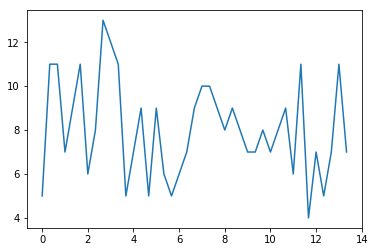

In [27]:
plt.plot(list_df["time"], list_df["people"], label="test")
plt.xlabel["time(sec.)"]
plt.ylabel["population"]
plt.ylim(0.15)
plt.show()

### ノック89

In [28]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("mov02.avi")
Width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
Height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
FPS = int(cap.get(cv2.CAP_PROP_FPS))

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
hogParams = {"winStride":(8,8), "padding":(32,32),"scale":1.05, "hitThreshold":0, "finalThreshold":5}

movie_name = "timelapse.avi"
fourcc = cv2.VideoWriter_fourcc("X", "V", "I", "D")
video = cv2.VideoWriter(movie_name, fourcc, 30, (Width, Height))

num = 0
list_df = pd.DataFrame(columns=["time", "people"])

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        if (num%10==0):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            human, r = hog.detectMultiScale(gray, **hogParams)
            if (len(human)>0):
                for (x,y,w,h) in human:
                    cv2.rectangle(frame, (x,y), (x+w, y+h), (255,255,255),3)
            tmp_set = pd.Series( [num/FPS, len(human) ], index=list_df.columns)
            list_df = list_df.append(tmp_set, ignore_index=True)
            #video.write(frame)
    else:
        break
    num += 1
    
#video.release()
cap.release()
cv2.destroyAllWindows()

TypeError: 'function' object is not subscriptable

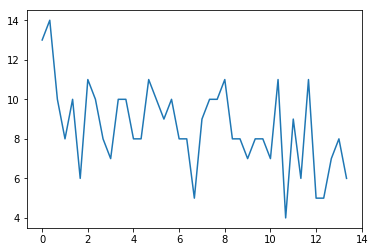

In [29]:
plt.plot(list_df["time"], list_df["people"], label="test")
plt.xlabel["time(sec.)"]
plt.ylabel["population"]
plt.ylim(0.15)
plt.show()

### ノック90

In [30]:
import numpy as np
def moving_average(x, y):
    y_conv = np.convolve(y, np.ones(5)/float(5), mode="valid")
    x_dat = np.linspace(np.min(x), np.max(x), np.size(y_conv))
    print(y_conv)
    print(x_dat)
    return x_dat, y_conv

[11.   9.6  9.   9.   9.   8.4  9.2  9.   8.6  8.6  9.4  9.4  9.2  9.6
  9.6  9.   8.   8.   8.   8.4  9.   9.6  9.4  8.8  8.4  7.8  7.6  8.2
  7.6  7.8  7.4  8.2  7.   7.2  6.8  7.2  6.2]
[ 0.          0.37037037  0.74074074  1.11111111  1.48148148  1.85185185
  2.22222222  2.59259259  2.96296296  3.33333333  3.7037037   4.07407407
  4.44444444  4.81481481  5.18518519  5.55555556  5.92592593  6.2962963
  6.66666667  7.03703704  7.40740741  7.77777778  8.14814815  8.51851852
  8.88888889  9.25925926  9.62962963 10.         10.37037037 10.74074074
 11.11111111 11.48148148 11.85185185 12.22222222 12.59259259 12.96296296
 13.33333333]


TypeError: 'function' object is not subscriptable

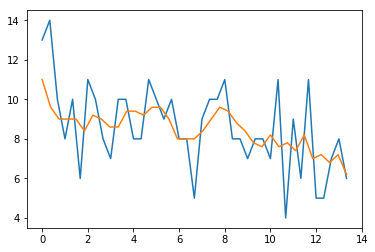

In [31]:
plt.plot(list_df["time"], list_df["people"], label="raw")
ma_x2, ma_y2 = moving_average(list_df["time"], list_df["people"])
plt.plot(ma_x2, ma_y2, label="average")
plt.xlabel["time(sec.)"]
plt.ylabel["population"]
plt.ylim(0.15)
plt.show()

In [35]:
list_df["people"]

0     13.0
1     14.0
2     10.0
3      8.0
4     10.0
5      6.0
6     11.0
7     10.0
8      8.0
9      7.0
10    10.0
11    10.0
12     8.0
13     8.0
14    11.0
15    10.0
16     9.0
17    10.0
18     8.0
19     8.0
20     5.0
21     9.0
22    10.0
23    10.0
24    11.0
25     8.0
26     8.0
27     7.0
28     8.0
29     8.0
30     7.0
31    11.0
32     4.0
33     9.0
34     6.0
35    11.0
36     5.0
37     5.0
38     7.0
39     8.0
40     6.0
Name: people, dtype: float64

In [34]:
np.ones(5)

array([1., 1., 1., 1., 1.])